#Amazon Unlocked Mobile

##Latar Belakang Dataset

Ponsel telah merevolusi cara kita membeli produk secara online, membuat semua informasi tersedia di ujung jari kita. Dengan semakin mudahnya akses informasi, maka semakin banyak konsumen yang akan mencari informasi produk dari konsumen lain selain dari informasi yang diberikan oleh penjual. Ulasan dan penilaian yang disampaikan oleh konsumen adalah contoh dari jenis informasi tersebut dan telah menjadi bagian integral dari proses keputusan pembelian pelanggan. Platform ulasan dan peringkat yang disediakan oleh pemain eCommerce menciptakan sistem transparan bagi konsumen untuk mengambil keputusan yang tepat dan merasa yakin tentang hal itu.

#Pertanyaan Analisis

Bagaimana hubungan antara Produk, harga produk dan peringkat produk?

#Import LIbrary

In [104]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:

**Product Name** = Nama Produk

**Brand Name** = Nama Brand

**Price** = Harga Product

**Rating** = Nilai Product 1-5

**Reviews** = penilaian para pengguna Product

**Reviw Votes** = vote untuk rewiew

#**Esploratory Data Analysis**

##Dimensi Data

In [106]:
df.shape

(413840, 6)

Dataset ini memiliki 413840 baris dan 6 kolom



##Variabel Pada Dataset

In [107]:
df.columns.values

array(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'], dtype=object)

In [108]:
df['Brand Name'] = df['Brand Name'].astype('string')

In [109]:
df.dtypes

Product Name     object
Brand Name       string
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  string 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(2), string(1)
memory usage: 18.9+ MB


##Mengecek Missing Data

In [111]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

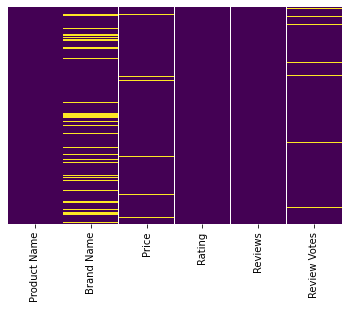

In [112]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Kolom-kolom dengan data kosong adalah: Brand Name, Price, Rivew Votes

##Mengecek Outlier

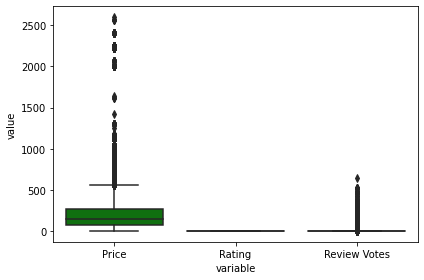

In [113]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Kolom numeric yang memiliki outlier adalah Price dan Rivew Votes

##Melihat Korelasi Data

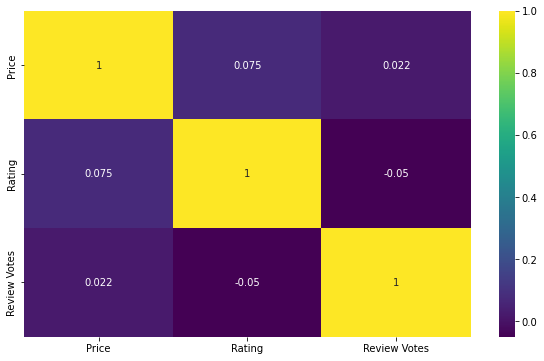

In [114]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

##Melihat Statistik Data

In [115]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


##Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



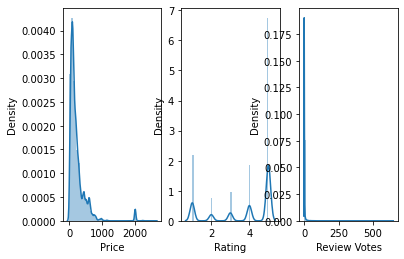

In [116]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

##Pairplot

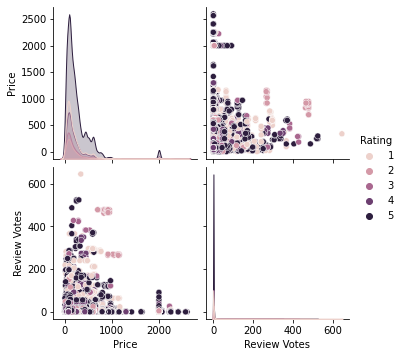

In [117]:
g = sns.pairplot(df1, hue="Rating")

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

#**Data Preparation**

In [118]:
df['Price'].value_counts()

99.99      11274
49.99       9335
59.99       7423
39.99       6963
179.99      5385
           ...  
437.99         1
87.88          1
2598.00        1
64.83          1
523.99         1
Name: Price, Length: 1754, dtype: int64

In [119]:
df['Rating'].value_counts()

5    223605
1     72350
4     61392
3     31765
2     24728
Name: Rating, dtype: int64

In [120]:
df['Brand Name'].value_counts()

Samsung         65747
BLU             63248
Apple           58186
LG              22417
BlackBerry      16872
                ...  
KIKAR               1
VIP                 1
apple               1
H2O                 1
OLA Products        1
Name: Brand Name, Length: 384, dtype: Int64

In [121]:
df_pre=df[['Price','Rating','Brand Name']]
df_pre=df_pre.dropna()
df_pre

,Price,Rating,Brand Name
0,199.99,5,Samsung
1,199.99,4,Samsung
2,199.99,5,Samsung
3,199.99,4,Samsung
4,199.99,4,Samsung
...,...,...,...
413835,79.95,5,Samsung
413836,79.95,3,Samsung
413837,79.95,5,Samsung
413838,79.95,3,Samsung


In [122]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344554 entries, 0 to 413839
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Price       344554 non-null  float64
 1   Rating      344554 non-null  int64  
 2   Brand Name  344554 non-null  string 
dtypes: float64(1), int64(1), string(1)
memory usage: 10.5 MB


#**Data Visualisasi**

In [ ]:
#Membuat Plot Scatter
import plotly.express as px
df_pre['Brand Name'] = df_pre['Brand Name'].astype('string')
fig = px.scatter(df_pre,
                 x = "Rating",
                 y = "Price",
                 color = "Brand Name",
                 size = "Rating",width=1600,height=800)

fig.update_layout(
    title = 'Amazon Unlocked Mobile',
    title_font_color = 'Blue',
    title_font_size = 30,

    xaxis = dict(
        title = 'Rating',
        titlefont_size = 16,
        tickfont_size = 14),
    yaxis = dict(
        title = 'Price',
        titlefont_size = 16,
        tickfont_size = 14))

fig.show()
